# ST 590 HomeWork 9

## Goal : Fit and evaluate models for classification purposes using sklearn.
<p  style="color:#ff6633;"> Let's read diamonds data to achieve our goal. </p>

In [1]:
import pandas as pd
import numpy as np
diamonds = pd.read_csv("diamonds.csv")

In [2]:
print(diamonds.columns)
diamonds.head()

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<p  style="color:#ff6633;">We will get rid of unwanted column `Unnamed:0` and create dummy variable for columns `cut` and `color` </p>

In [3]:
diamonds = diamonds.drop(diamonds.columns[0], axis = 1)
cut_dummies = pd.get_dummies(diamonds.cut)
color_dummies = pd.get_dummies(diamonds.color)


In [4]:
print(diamonds.columns)
diamonds.head()

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<p  style="color:#ff6633;"> <br />
    1. We will add new binary column __is_expensive__ based on price for each dimond more than value 3000 will be consider as expensive which gives us ~ 23000 records out of 53000 and rest will be non-expensive. <br />
    2. Keep a copy of dimonds dataset before we remove any original columns <br />
    3. Since we have created dummy variables for cut and color, will get rid of these columns and also the price column. <br />
    4. We will add dummy variables and newly created column - is_expensive in the diamonds dataset. <br /><br />
</p>

In [5]:
diamonds['is_expensive'] = pd.Series(np.where(diamonds['price']>=3000, 1, 0))
Org_diamonds = diamonds

diamonds = diamonds.drop(["clarity", "cut", "color","price"], axis = 1)
diamonds = diamonds.join(cut_dummies).join(color_dummies)


<p  style="color:#ff6633;"> Let's see our final dataset and summary of the original data. </p>

In [6]:
diamonds.head()

,carat,depth,table,x,y,z,is_expensive,Fair,Good,Ideal,Premium,Very Good,D,E,F,G,H,I,J
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,0,1,0,0,0,0,0,0,0,0,0,1


In [7]:
Org_diamonds.describe()

,carat,depth,table,price,x,y,z,is_expensive
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.437634
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.496100
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,1.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000


<p  style="color:#ff6633;"> Now we are interested in is_expensive column. so let's see contingency table for is_expensive column. </p>

In [8]:
diamonds.is_expensive_cat = diamonds.is_expensive.astype("category")
diamonds.is_expensive_cat.cat.categories = ["No Expensive", "Expensive"]
diamonds.is_expensive_cat[0:2]


C:\Users\kar_d\AppData\Local\Temp/ipykernel_35196/3194509331.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  diamonds.is_expensive_cat = diamonds.is_expensive.astype("category")


0    No Expensive
1    No Expensive
Name: is_expensive, dtype: category
Categories (2, object): ['No Expensive', 'Expensive']

In [9]:
diamonds.is_expensive_cat.value_counts()

No Expensive    30334
Expensive       23606
Name: is_expensive, dtype: int64

In [10]:
Org_diamonds.cut_cat = Org_diamonds.cut.astype("category")
Org_diamonds.cut_cat.cat.categories = ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
Org_diamonds.cut_cat[0:5]

C:\Users\kar_d\AppData\Local\Temp/ipykernel_35196/3446160444.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Org_diamonds.cut_cat = Org_diamonds.cut.astype("category")


0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

In [69]:
pd.crosstab(
 diamonds.is_expensive_cat,
 Org_diamonds.cut_cat,
 margins = True,
 rownames = ["is_expensive"],
 colnames = ["cut"]
 )

cut,Fair,Good,Ideal,Premium,Very Good,All
is_expensive,,,,,,
No Expensive,721,2431,13934,6757,6491,30334
Expensive,889,2475,7617,7034,5591,23606
All,1610,4906,21551,13791,12082,53940


<p  style="color:#ff6633;"> Looking at the small summary of is_expensive, there are ~7000 records for no-expensive diamonds more than expensive diamonds. We observe very less diamonds are popular in category Good and most popular category is Ideal. </p>

## 2. Training and Test Split

<p  style="color:#ff6633;"> First, let's just read in all the functions we'll need from sklearn.</p>

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import seaborn as sns

<div style="color:#ff6633;"> Divide the data for cross validation 80 percent for training and 20 percent for testing </p>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
  diamonds.drop("is_expensive", axis = 1),
  diamonds["is_expensive"], 
  test_size=0.20, 
  random_state=42)

<p  style="color:#ff6633;"> We will proceed with Classification Model fitting on our diamonds data and compare which is the best model</p>

## 3. Classification Tree Model

In [52]:
parameters = {'max_depth': range(2,20), 'min_samples_leaf':[10, 50, 100, 250]}
tree_model = GridSearchCV(DecisionTreeClassifier(),
                            parameters, 
                            cv = 5, 
                            scoring='f1_micro') \
                          .fit(X_train, y_train)

In [53]:
print(tree_model.best_estimator_, tree_model.best_score_,)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=50) 0.9592139520253127


In [54]:
ctree_cv = cross_validate(tree_model.best_estimator_,
                          X_train,
                          y_train,
                          cv = 5,
                          scoring='f1_micro')

In [55]:
print(ctree_cv['test_score'])

[0.95991195 0.95805816 0.95816918 0.96013905 0.95979143]


In [56]:
print('---------------classification report-------------------')
y_pred = tree_model.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

---------------classification report-------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      6067
           1       0.96      0.95      0.95      4721

    accuracy                           0.96     10788
   macro avg       0.96      0.96      0.96     10788
weighted avg       0.96      0.96      0.96     10788



In [57]:
cf_matrix = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

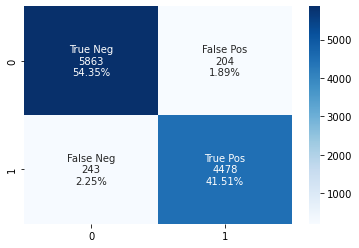

In [58]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

<p  style="color:#ff6633;"> Decision Tree Classifier gave us a good results. We used cross validation folds as 5. We observed best estimator for max depth 13 and min sample leaf as 50. Using Metric f1_micro donotes,  best score as 0.9592139520253127. As per Classification report, f1_score gave probability of non-expensive diamonds is 96% where as for expensive diamonds is 95%.  Prediction results has been displayed on Confusion Matrix as True positive 41.51% and True Negative as 54.35%. Model falsely predicted 1.89% as positive results and 2.25% as negative results.  Overall Decision Tree Classifier is providing pretty good prediction.  </p>

## Random Forest Classifier

In [21]:
parameters = {"max_features" : range(1, X_train.shape[1])}
rf_tune = GridSearchCV(RandomForestClassifier(n_estimators = 100),
                          parameters,
                          cv = 5,
                          scoring='f1_micro') \
                          .fit(X_train, y_train)

In [22]:
print(rf_tune.best_estimator_, rf_tune.best_score_,)

RandomForestClassifier(max_features=3) 0.9619484187062911


In [23]:
rf_cv = cross_validate(rf_tune.best_estimator_,
                       X_train,
                       y_train,
                       cv = 5,
                       scoring='f1_micro')

In [24]:
print(rf_cv['test_score'])

[0.96408296 0.96083884 0.96013905 0.96164542 0.96095017]


In [25]:
rf_best = rf_tune.best_estimator_.fit(X_train, y_train)

In [26]:
print('---------------classification report-------------------')
y_pred = rf_tune.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

---------------classification report-------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6067
           1       0.96      0.95      0.95      4721

    accuracy                           0.96     10788
   macro avg       0.96      0.96      0.96     10788
weighted avg       0.96      0.96      0.96     10788



In [27]:
cf_matrix = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

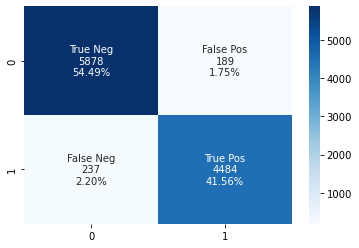

In [28]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

<p  style="color:#ff6633;"> Random Forest Classifier also gave us a good results. We used cross validation folds as 5 and max features 1 predictor less out of all predictors. We observed best estimator is with max feature as 3. Using Metric f1_micro donotes,  best score as 0.9619484187062911. Prediction results has been displayed on Confusion Matrix as True positive 41.56% and True Negative as 54.49%. Model falsely predicted 1.75% as positive results which is same as Decision Tree classifier and 2.20% as negative results.  Overall Random Forest Classifier is providing pretty good prediction very slightly better than Decision Tree Model but we can take these 2 are as equally good.  </p>

## Random Forest Classifier with all Predictors (Bagging Tree)

In [59]:
parameters = {"max_features" : range(X_train.shape[1],19)}
bt_tune = GridSearchCV(RandomForestClassifier(n_estimators = 100),
                          parameters,
                          cv = 5,
                          scoring='f1_micro') \
                          .fit(X_train, y_train)

In [67]:
print(bt_tune.best_estimator_, bt_tune.best_score_)

RandomForestClassifier(max_features=18) 0.9605348421364527


In [61]:
bt_cv = cross_validate(bt_tune.best_estimator_,
                       X_train,
                       y_train,
                       cv = 5,
                       scoring='f1_micro')

In [62]:
print(bt_cv['test_score'])

[0.96118642 0.96107056 0.96095017 0.96025492 0.95967555]


In [63]:
bt_best = bt_tune.best_estimator_.fit(X_train, y_train)

In [64]:
print('---------------classification report-------------------')
y_pred = bt_tune.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

---------------classification report-------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6067
           1       0.95      0.95      0.95      4721

    accuracy                           0.96     10788
   macro avg       0.96      0.96      0.96     10788
weighted avg       0.96      0.96      0.96     10788



In [65]:
cf_matrix = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

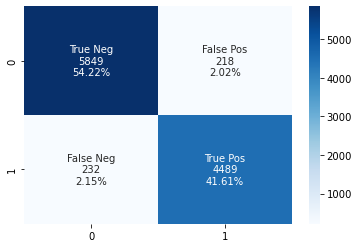

In [66]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

<p  style="color:#ff6633;"> Random Forest Classifier with all the features which is actually Bagging Tree Classifier also gave us a good results. We used cross validation folds as 5 and max features 18 predictors , all predictors. Classificatin report shows probability of non-expensive diamond prediction is 0.96 and for expensive diamonds is 0.95. Using Metric f1_micro donotes using all max features,  best score as 0.9605348421364527. Prediction results has been displayed on Confusion Matrix as True positive 41.61% and True Negative as 54.22%. Model falsely predicted 2.02% as positive results which is same as Decision Tree classifier and 2.15% as negative results. So Overall Random Forest Classifier is providing pretty good prediction very slightly better than Bagging Tree as well as Decision Tree Model.  </p>

## Gradient Boosting Model

In [37]:
parameters = {'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1], 'max_features':range(X_train.shape[1],19)}

gb_tune = GridSearchCV(GradientBoostingClassifier(n_estimators = 100, random_state= 0),
                          parameters,
                          cv = 5,
                          scoring='f1_micro') \
                          .fit(X_train, y_train)

In [68]:
print(gb_tune.best_estimator_, gb_tune.best_score_)

GradientBoostingClassifier(learning_rate=0.25, max_features=18, random_state=0) 0.9617167173275132


In [39]:
gb_cv = cross_validate(rf_tune.best_estimator_,
                       X_train,
                       y_train,
                       cv = 5,
                       scoring='f1_micro')

In [40]:
print(gb_cv['test_score'])

[0.96350365 0.96130228 0.96141367 0.9617613  0.96071842]


In [41]:
gb_best = gb_tune.best_estimator_.fit(X_train, y_train)

In [42]:
print('---------------classification report-------------------')
y_pred = gb_tune.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

---------------classification report-------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6067
           1       0.96      0.95      0.95      4721

    accuracy                           0.96     10788
   macro avg       0.96      0.96      0.96     10788
weighted avg       0.96      0.96      0.96     10788



In [43]:
cf_matrix = confusion_matrix(y_test, y_pred)

In [44]:
cf_matrix

array([[5886,  181],
       [ 242, 4479]], dtype=int64)

<AxesSubplot:>

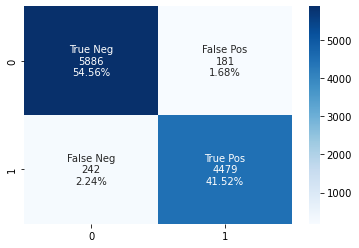

In [45]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

<p  style="color:#ff6633;"> Gradient Boosting Classifier is little complex algorithm which is slow training model. It fits trees using the residuals as response to get predictions.  We used cross validation folds as 5, bunch of learning rates and max features in range till all the predictors. We observed best estimator for learning rate as 0.25 using all the predictors  as 18. Using Metric f1_micro donotes,  best score as 0.9617167173275132. As per Classification report, f1_score gave probability of non-expensive diamonds is 97% where as for expensive diamonds is 95%.  Prediction results has been displayed on Confusion Matrix as True positive 41.52% and True Negative as 54.56%. Model falsely predicted 1.68% as positive results and 2.24% as negative results. we observe on False Positive, its predicting wrongly less than other all models we saw till now.  Overall Gradient Boosing Tree Classifier is providing pretty good prediction slightly better than Random Forest Model, too  </p>

## Logistic Regression

In [46]:
log_reg1 = LogisticRegression(solver="newton-cg",penalty = "none")

cv1 = cross_validate(log_reg1,

      X_train.values,

      y_train.values,

      cv = 5)

cv1['test_score']

array([0.96222917, 0.95921678, 0.95538818, 0.96048667, 0.96060255])

In [47]:
log_reg1.fit(X = X_train, y = y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [48]:
y_pred = log_reg1.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      6067
           1       0.96      0.94      0.95      4721

    accuracy                           0.96     10788
   macro avg       0.96      0.96      0.96     10788
weighted avg       0.96      0.96      0.96     10788



In [50]:
cf_matrix = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

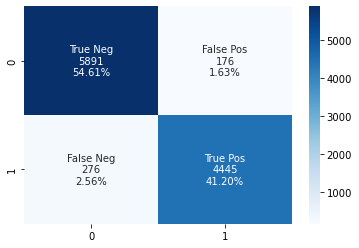

In [51]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

<p  style="color:#ff6633;"> Yup, Lastly we will compare now results with Logistic Regression Model. This is little complex algorithm. We used cross validation folds as 5 and not any penalty. There is no best estimator for Logistic Regression Algorithm. As per Classification report, f1_score gave probability of non-expensive diamonds is 96% where as for expensive diamonds is 95%.  Prediction results has been displayed on Confusion Matrix as True positive 41.20% and True Negative as 54.61%. Model falsely predicted 1.63% as positive results and 2.56% as negative results. we observe on False Positive, its predicting wrongly less than other all models we saw till now.  Overall Logistic Regression model is providing pretty good prediction almost same as Gradient Boosting but definately better than Dicision Tree, Boosting Tree and Random Forest Classifies. 

<div style="color:#ff6633;">Since Gradient boosting is a slow training model, and as per all the comparisons, we can come up to the conclusion that  Logistic Regression is the best model. </div></p>